In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading CSV

In [6]:
clean_lines = []
with open("zomato.csv", "r", encoding="utf-8") as f:
    for line in f:
        if line.count('"') % 2 == 0:
            clean_lines.append(line)  # Line has balanced quotes

# Save the cleaned file
with open("zomato_clean.csv", "w", encoding="utf-8") as f:
    f.writelines(clean_lines)

# Load the cleaned file
df = pd.read_csv("zomato_clean.csv")
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
1,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
2,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/cafe-shuffle-...,"941, 3rd FLOOR, 21st Main, 22nd Cross, Banasha...",Cafe Shuffle,Yes,Yes,4.2/5,150,+91 9742166777,Banashankari,Cafe,"Mocktails, Peri Fries, Lasagne, Pizza, Chicken...","Cafe, Italian, Continental",600,"[('Rated 1.0', ""RATED\n \n\nHorrible. Not even...",[],Cafes,Banashankari
4,https://www.zomato.com/bangalore/the-coffee-sh...,"6th Block, 3rd Stage, Banashankari, Bangalore",The Coffee Shack,Yes,Yes,4.2/5,164,+91 9731644212,Banashankari,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500,"[('Rated 4.0', ""RATED\n Food - 4/5\nAmbience ...",[],Cafes,Banashankari


In [7]:
df.shape

(113, 17)

In [8]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [9]:
df = df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'], axis = 1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
1,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
2,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
3,Cafe Shuffle,Yes,Yes,4.2/5,150,Banashankari,Cafe,"Cafe, Italian, Continental",600,Cafes,Banashankari
4,The Coffee Shack,Yes,Yes,4.2/5,164,Banashankari,Cafe,"Cafe, Chinese, Continental, Italian",500,Cafes,Banashankari


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         113 non-null    object
 1   online_order                 113 non-null    object
 2   book_table                   113 non-null    object
 3   rate                         94 non-null     object
 4   votes                        113 non-null    int64 
 5   location                     113 non-null    object
 6   rest_type                    113 non-null    object
 7   cuisines                     113 non-null    object
 8   approx_cost(for two people)  113 non-null    object
 9   listed_in(type)              113 non-null    object
 10  listed_in(city)              113 non-null    object
dtypes: int64(1), object(10)
memory usage: 9.8+ KB


Dropping Duplicates

In [11]:
df.drop_duplicates(inplace = True)
df.shape

(113, 11)

Cleaning Rate Column

In [12]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.2/5', '4.0/5', '3.9/5', '3.1/5',
       '3.6/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5', 'NEW', '2.9/5', nan,
       '3.5/5', '3.4/5', '3.0/5'], dtype=object)

Removing "NEW" , "-" and "/5" from Rate Column

In [13]:
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
df['rate'] = df['rate'].apply(handlerate)
df['rate'].head()

0    4.1
1    3.8
2    3.7
3    4.2
4    4.2
Name: rate, dtype: float64

Filling Null Values in Rate Column with Mean

In [14]:
df['rate'] = df['rate'].fillna(df['rate'].mean())
df['rate'].isnull().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         113 non-null    object 
 1   online_order                 113 non-null    object 
 2   book_table                   113 non-null    object 
 3   rate                         113 non-null    float64
 4   votes                        113 non-null    int64  
 5   location                     113 non-null    object 
 6   rest_type                    113 non-null    object 
 7   cuisines                     113 non-null    object 
 8   approx_cost(for two people)  113 non-null    object 
 9   listed_in(type)              113 non-null    object 
 10  listed_in(city)              113 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 9.8+ KB


Dropping Null Values

In [16]:
df.dropna(inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
1,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
2,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
3,Cafe Shuffle,Yes,Yes,4.2,150,Banashankari,Cafe,"Cafe, Italian, Continental",600,Cafes,Banashankari
4,The Coffee Shack,Yes,Yes,4.2,164,Banashankari,Cafe,"Cafe, Chinese, Continental, Italian",500,Cafes,Banashankari


In [17]:
df.rename(columns = {'approx_cost(for two people)':'Cost2plates', 'listed_in(type)':'Type'}, inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
1,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
2,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
3,Cafe Shuffle,Yes,Yes,4.2,150,Banashankari,Cafe,"Cafe, Italian, Continental",600,Cafes,Banashankari
4,The Coffee Shack,Yes,Yes,4.2,164,Banashankari,Cafe,"Cafe, Chinese, Continental, Italian",500,Cafes,Banashankari


In [18]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout',
       'Vijay Nagar'], dtype=object)

In [19]:
df['listed_in(city)'].unique()

array(['Banashankari'], dtype=object)

Listed in(city) and location, both are there, lets keep only one.

In [20]:
df = df.drop(['listed_in(city)'], axis = 1)

In [21]:
df['Cost2plates'].unique()

array(['800', '300', '600', '500', '450', '400', '900', '200', '550',
       '750', '150', '100', '1,200', '700', '950', '250', '1,000', '350',
       '650'], dtype=object)

Removing , from Cost2Plates Column

In [22]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)
    
df['Cost2plates'] = df['Cost2plates'].apply(handlecomma)
df['Cost2plates'].unique()
        

array([ 800.,  300.,  600.,  500.,  450.,  400.,  900.,  200.,  550.,
        750.,  150.,  100., 1200.,  700.,  950.,  250., 1000.,  350.,
        650.])

In [23]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
1,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
2,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
3,Cafe Shuffle,Yes,Yes,4.2,150,Banashankari,Cafe,"Cafe, Italian, Continental",600.0,Cafes
4,The Coffee Shack,Yes,Yes,4.2,164,Banashankari,Cafe,"Cafe, Chinese, Continental, Italian",500.0,Cafes


Cleaning Rest Type Column

In [24]:
rest_types = df['rest_type'].value_counts(ascending  = False)
rest_types

rest_type
Quick Bites                   47
Cafe                          14
Casual Dining                 10
Takeaway, Delivery            10
Delivery                       7
Dessert Parlor                 7
Bakery                         4
Beverage Shop                  3
Bar                            2
Cafe, Casual Dining            2
Confectionery                  1
Beverage Shop, Quick Bites     1
Pub                            1
Mess                           1
Bakery, Dessert Parlor         1
Cafe, Quick Bites              1
Quick Bites, Beverage Shop     1
Name: count, dtype: int64

In [25]:
rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000

rest_type
Quick Bites                   47
Cafe                          14
Casual Dining                 10
Takeaway, Delivery            10
Delivery                       7
Dessert Parlor                 7
Bakery                         4
Beverage Shop                  3
Bar                            2
Cafe, Casual Dining            2
Confectionery                  1
Beverage Shop, Quick Bites     1
Pub                            1
Mess                           1
Bakery, Dessert Parlor         1
Cafe, Quick Bites              1
Quick Bites, Beverage Shop     1
Name: count, dtype: int64

Making Rest Types less than 1000 in frequency as others

In [26]:
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value
        
df['rest_type'] = df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()
        

rest_type
others    113
Name: count, dtype: int64

### Top Locations by Restaurant Count
This bar chart shows the top 15 most common restaurant locations in the dataset.

C:\Users\hp\AppData\Local\Temp\ipykernel_8776\1154147809.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')


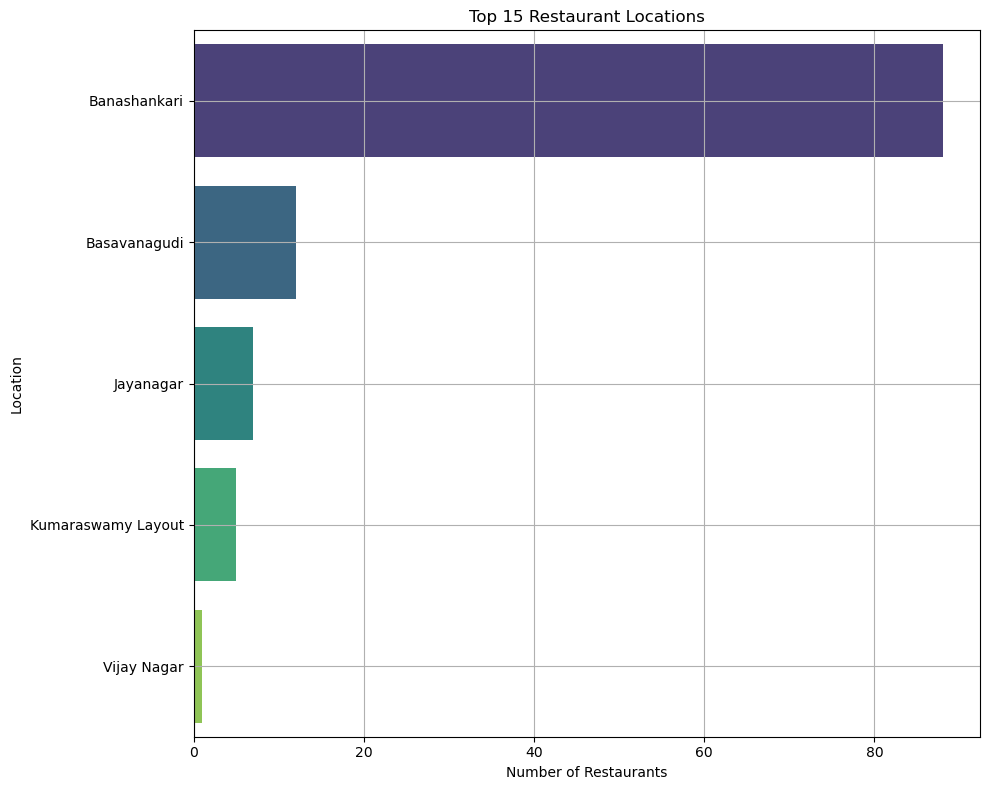

In [27]:
plt.figure(figsize=(10, 8))
top_locations = df['location'].value_counts().head(15)
sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')
plt.title("Top 15 Restaurant Locations")
plt.xlabel("Number of Restaurants")
plt.ylabel("Location")
plt.grid(True)
plt.tight_layout()
plt.show()

Cleaning Location Column

C:\Users\hp\AppData\Local\Temp\ipykernel_8776\1154147809.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')


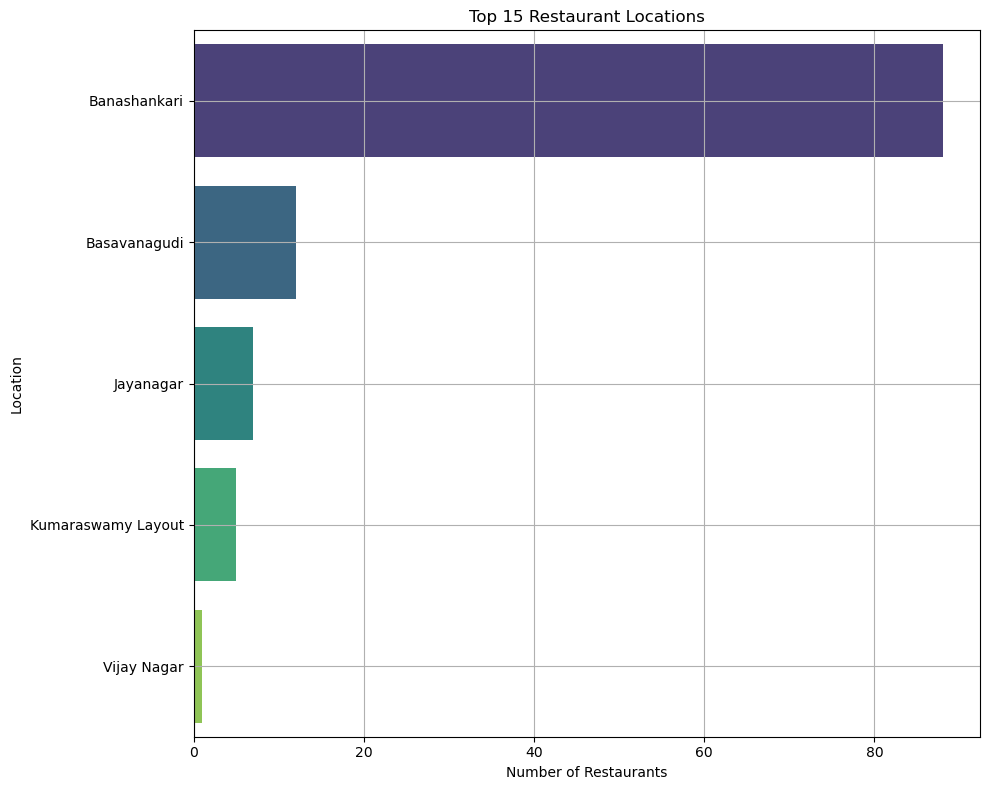

In [28]:
plt.figure(figsize=(10, 8))
top_locations = df['location'].value_counts().head(15)
sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')
plt.title("Top 15 Restaurant Locations")
plt.xlabel("Number of Restaurants")
plt.ylabel("Location")
plt.grid(True)
plt.tight_layout()
plt.show()

Cleaning Cuisines Column

In [29]:
cuisines = df['cuisines'].value_counts(ascending  = False)


cuisines_lessthan100 = cuisines[cuisines<100]



def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
        
df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()


cuisines
others    113
Name: count, dtype: int64

In [30]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Spice Elephant,Yes,No,4.1,787,Banashankari,others,others,800.0,Buffet
1,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
2,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,others,others,300.0,Buffet
3,Cafe Shuffle,Yes,Yes,4.2,150,Banashankari,others,others,600.0,Cafes
4,The Coffee Shack,Yes,Yes,4.2,164,Banashankari,others,others,500.0,Cafes


Data is Clean, Lets jump to Visualization

Count Plot of various Locations

Visualizing Online Order

### Online Order Availability
This chart shows the number of restaurants that support online ordering.

<Axes: xlabel='count', ylabel='online_order'>

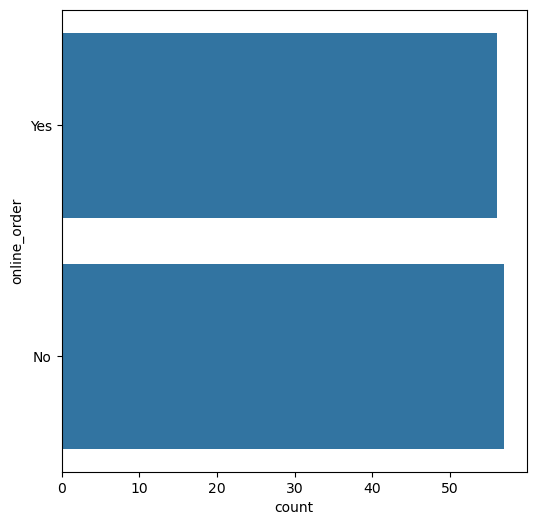

In [31]:
plt.figure(figsize=(6, 6))
sns.countplot(y='online_order', data=df)

Visualizing Book Table

### Table Booking Availability
This chart shows how many restaurants offer table booking.

C:\Users\hp\AppData\Local\Temp\ipykernel_8776\222089420.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['book_table'], palette = 'rainbow')


<Axes: xlabel='count', ylabel='book_table'>

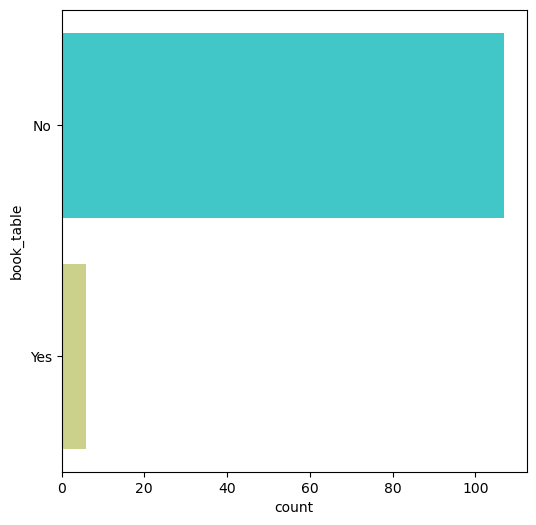

In [32]:
plt.figure(figsize = (6,6))
sns.countplot(df['book_table'], palette = 'rainbow')

Visualizing Online Order vs Rate

### Effect of Online Ordering on Ratings
This boxplot visualizes the distribution of ratings for restaurants with and without online ordering.

### Do Online Orders Affect Ratings?
This boxplot shows the distribution of ratings for restaurants based on whether they offer online ordering. The median and spread give insight into how ratings vary.

<Axes: xlabel='online_order', ylabel='rate'>

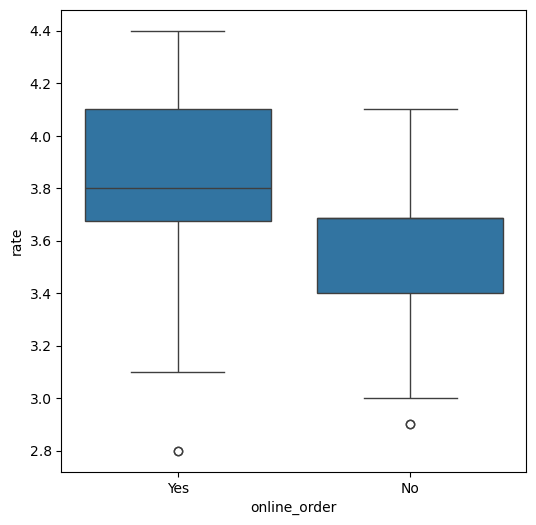

In [33]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

### Effect of Table Booking on Ratings
This boxplot visualizes the ratings distribution for restaurants based on table booking availability.

Visualizing Book Table vs Rate

<Axes: xlabel='book_table', ylabel='rate'>

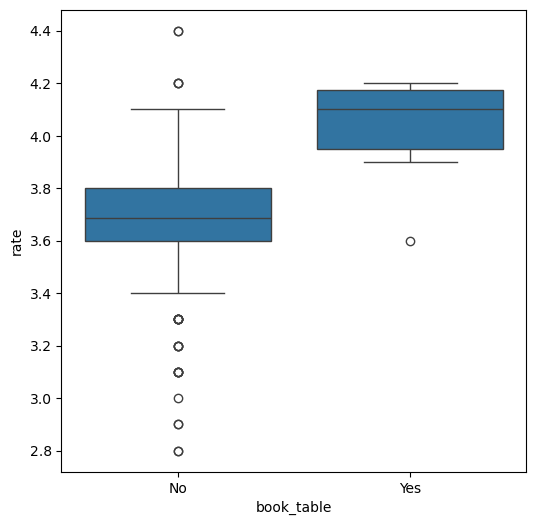

In [34]:
plt.figure(figsize = (6, 6))
sns.boxplot(x = 'book_table', y = 'rate', data = df)

Visualizing Online Order Facility, Location Wise

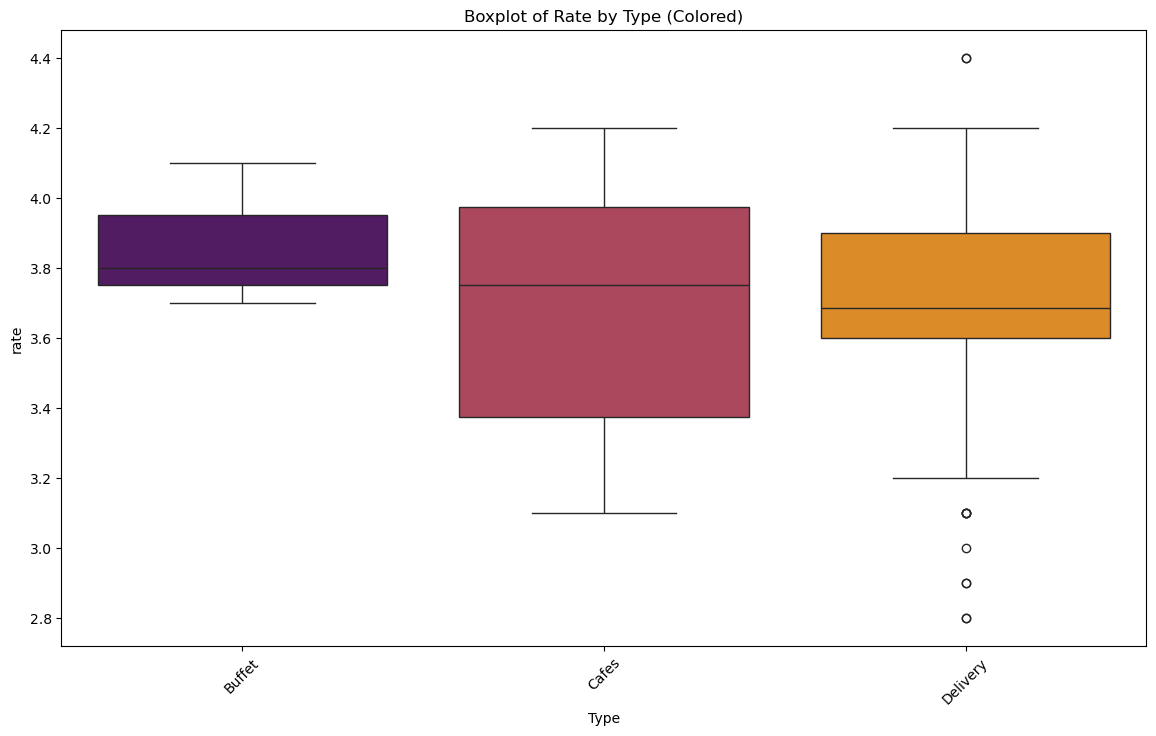

In [35]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Type', y='rate', hue='Type', data=df, palette='inferno', legend=False)
plt.xticks(rotation=45)
plt.title('Boxplot of Rate by Type (Colored)')
plt.show()

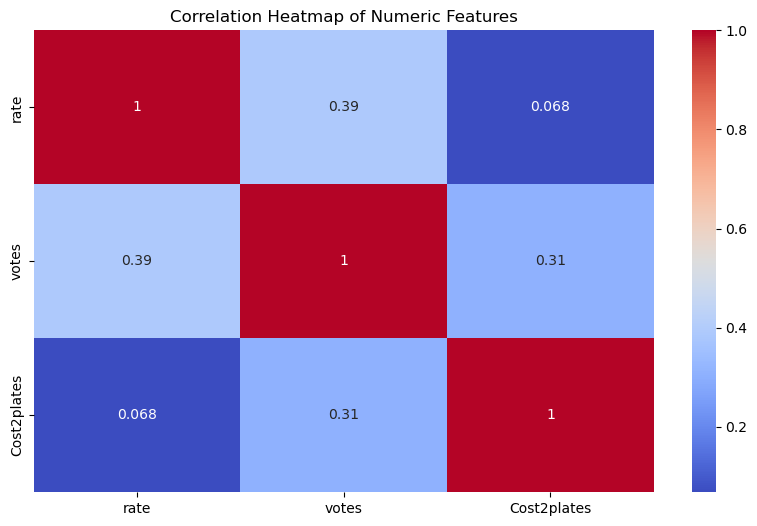

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

Visualizing Types of Restaurents vs Rate

C:\Users\hp\AppData\Local\Temp\ipykernel_8776\2234948669.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Type', y = 'rate', data = df, palette = 'inferno')


<Axes: xlabel='Type', ylabel='rate'>

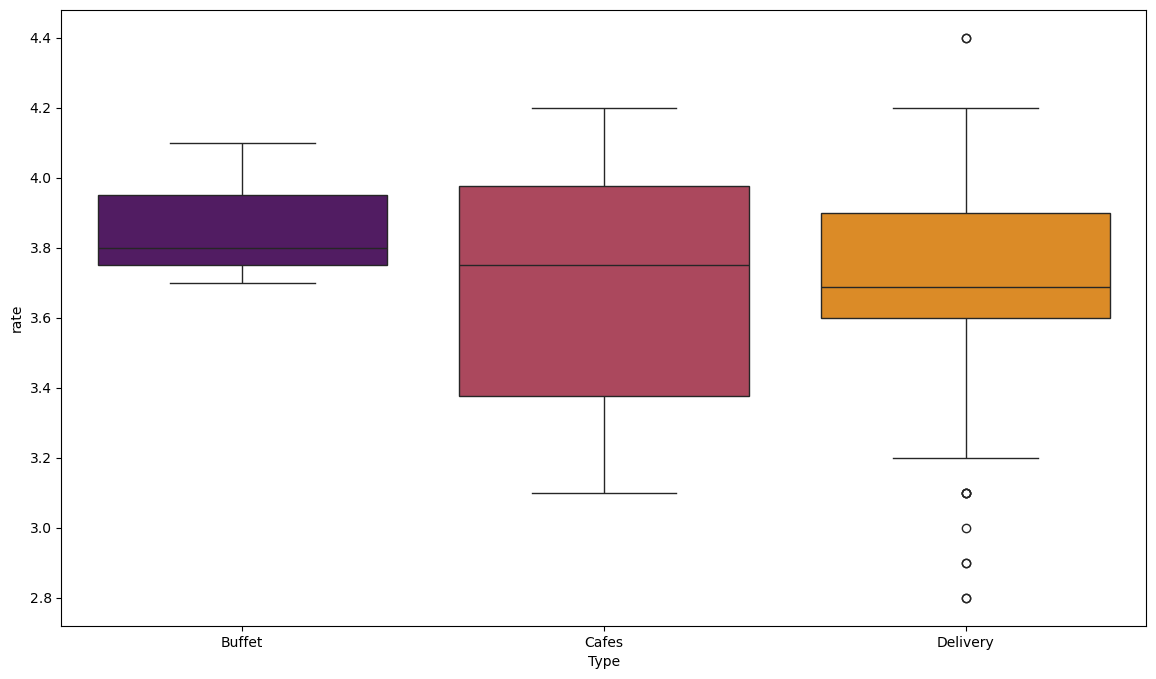

In [37]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Type', y = 'rate', data = df, palette = 'inferno')

Grouping Types of Restaurents, location wise

In [42]:
df3 = df.groupby(['location', 'Type'])['name'].count()
df3.to_csv('location_Type.csv')
df3 = pd.read_csv('location_Type.csv')
df3 = pd.pivot_table(df3, values='name', index='location', columns='Type', fill_value=0, aggfunc='sum')
df3

Type,Buffet,Cafes,Delivery
location,,,
others,3,14,96


<Axes: xlabel='location'>

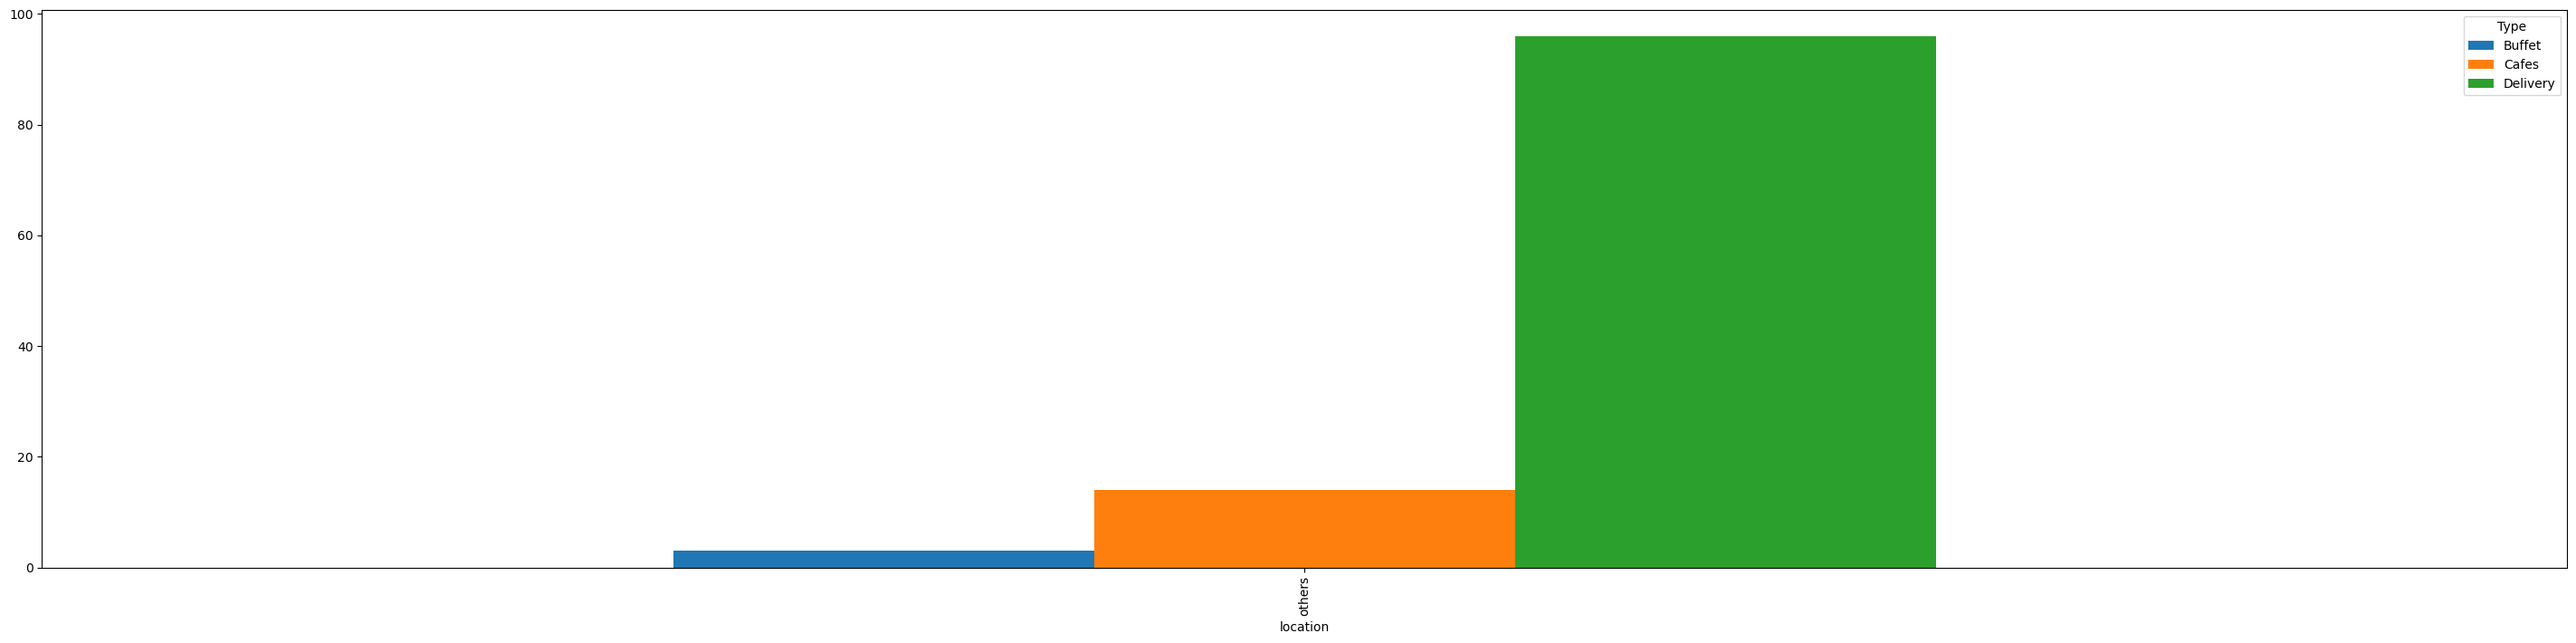

In [43]:
df3.plot(kind = 'bar', figsize = (36,8))

No. of Votes, Location Wise

In [44]:
df4 = df[['location', 'votes']]
df4.drop_duplicates()
df5 = df4.groupby(['location'])['votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('votes', ascending=False)
df5.head()

,votes
location,
others,24568


([0], [Text(0, 0, 'others')])

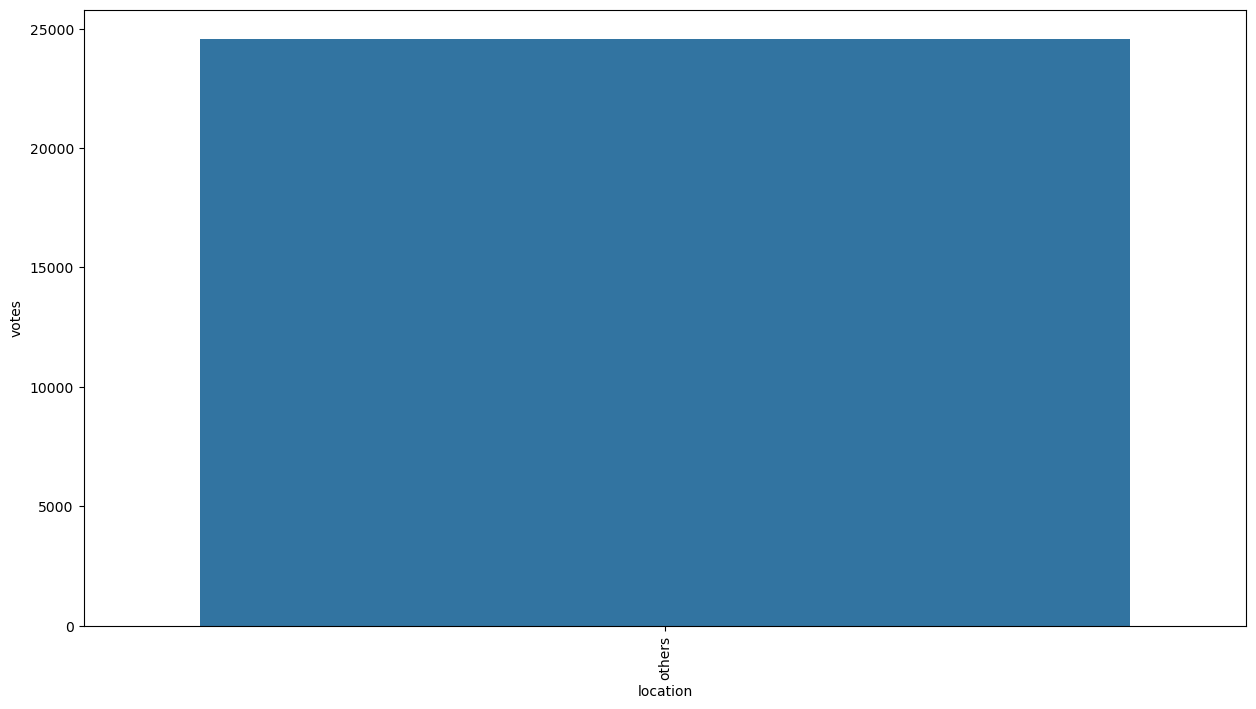

In [45]:
plt.figure(figsize=(15, 8))
sns.barplot(x=df5.index, y=df5['votes'])
plt.xticks(rotation=90)


In [46]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Spice Elephant,Yes,No,4.1,787,others,others,others,800.0,Buffet
1,San Churro Cafe,Yes,No,3.8,918,others,others,others,800.0,Buffet
2,Addhuri Udupi Bhojana,No,No,3.7,88,others,others,others,300.0,Buffet
3,Cafe Shuffle,Yes,Yes,4.2,150,others,others,others,600.0,Cafes
4,The Coffee Shack,Yes,Yes,4.2,164,others,others,others,500.0,Cafes


Visualizing Top Cuisines

In [47]:
df6 = df[['cuisines', 'votes']].drop_duplicates()
df7 = df6.groupby('cuisines')['votes'].sum()

In [48]:
df7 = df7.to_frame().sort_values('votes', ascending=False).reset_index()

In [49]:
print(df7.shape)
print(df7.head())

(1, 2)
  cuisines  votes
0   others  23405


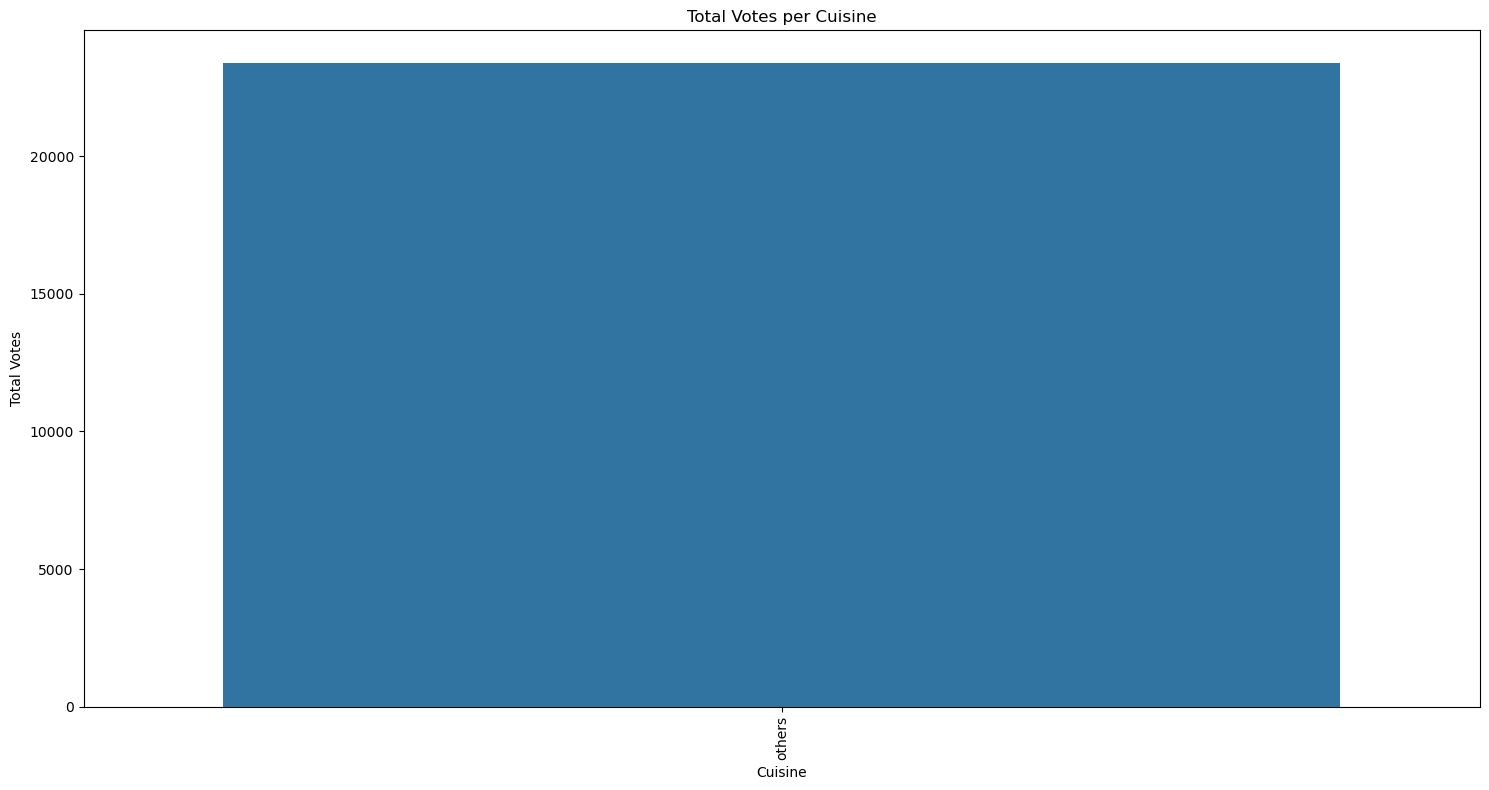

In [50]:
plt.figure(figsize=(15, 8))
sns.barplot(x='cuisines', y='votes', data=df7)
plt.xticks(rotation=90)
plt.title("Total Votes per Cuisine")
plt.xlabel("Cuisine")
plt.ylabel("Total Votes")
plt.tight_layout()
plt.show()

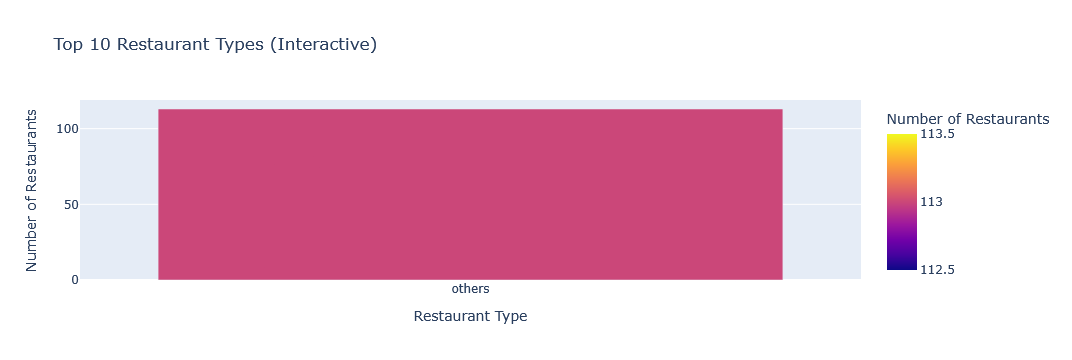

In [55]:
import plotly.express as px

top_rest_types = df['rest_type'].value_counts().head(10).reset_index()
top_rest_types.columns = ['rest_type', 'count']

fig = px.bar(top_rest_types, x='rest_type', y='count',
             color='count', title="Top 10 Restaurant Types (Interactive)",
             labels={'count': 'Number of Restaurants', 'rest_type': 'Restaurant Type'})
fig.show()


## Conclusion and Insights
- Most restaurants are concentrated in a few key locations.
- Online ordering and table booking options can influence ratings slightly.
- North Indian and Fast Food are among the most popular cuisines.
- The average cost for two people is moderate, but varies significantly by location and restaurant type.

Future work could include deeper geographic analysis or customer sentiment modeling from reviews.


### Correlation Heatmap
This heatmap shows relationships between numeric variables like cost and ratings.

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

### Interactive Chart: Top Restaurant Types
This interactive bar chart shows the most common restaurant types.

In [1]:
import plotly.express as px

top_rest_types = df['rest_type'].value_counts().head(10).reset_index()
top_rest_types.columns = ['rest_type', 'count']

fig = px.bar(top_rest_types, x='rest_type', y='count',
             color='count', title="Top 10 Restaurant Types (Interactive)",
             labels={'count': 'Number of Restaurants', 'rest_type': 'Restaurant Type'})
fig.show()

NameError: name 'df' is not defined

## Conclusion
- Most restaurants are concentrated in areas like BTM, Koramangala, and Whitefield.
- Online ordering and table booking are both moderately associated with higher ratings.
- North Indian and Fast Food dominate the cuisine space.
- Cost and location seem to be weakly correlated with ratings.